<a href="https://colab.research.google.com/github/Siddhi-Sovle/BITCOIN-TO-USDT-AUTOMATED-TRADING-STRATEGY_GitHub/blob/main/BITCOIN_TO_USDT_AUTOMATED_TRADING_STRATEGY_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BITCOIN-TO-USDT AUTOMATED TRADING STRATEGY**

Algorithmic trading has surged in popularity within the BTC/USDT market, propelled by the cryptocurrency market's relentless volatility and round-the-clock activity. What's particularly captivating is the deployment of advanced trading algorithms capable of swiftly analyzing vast datasets, historical price fluctuations, and real-time market indicators. These cutting-edge algorithms empower traders to execute intricate trading strategies—ranging from arbitrage to trend following and statistical arbitrage—with unparalleled speed and accuracy, ushering in a new era of precision-driven cryptocurrency trading.






In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [38]:
pip install dash dash-core-components dash-html-components plotly pandas

In [39]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
from dash.dependencies import Input, Output

In [40]:
pip install mplfinance

In [41]:
df = pd.read_csv("/content/btc_4h.csv")

In [42]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13155.38,13410.03,1676.204807
1,2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836
2,2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931
3,2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153
4,2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234


In [43]:
dure = df

In [44]:
# df.set_index('datetime', inplace=True)

#**Data Visualisation**



In [45]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

In [46]:
df1 = df[df['year']==2018]
df2 = df[df['year']==2019]
df3 = df[df['year']==2020]
df4 = df[df['year']==2021]
df5 = df[df['year']==2022]

In [47]:
import mplfinance as mpf

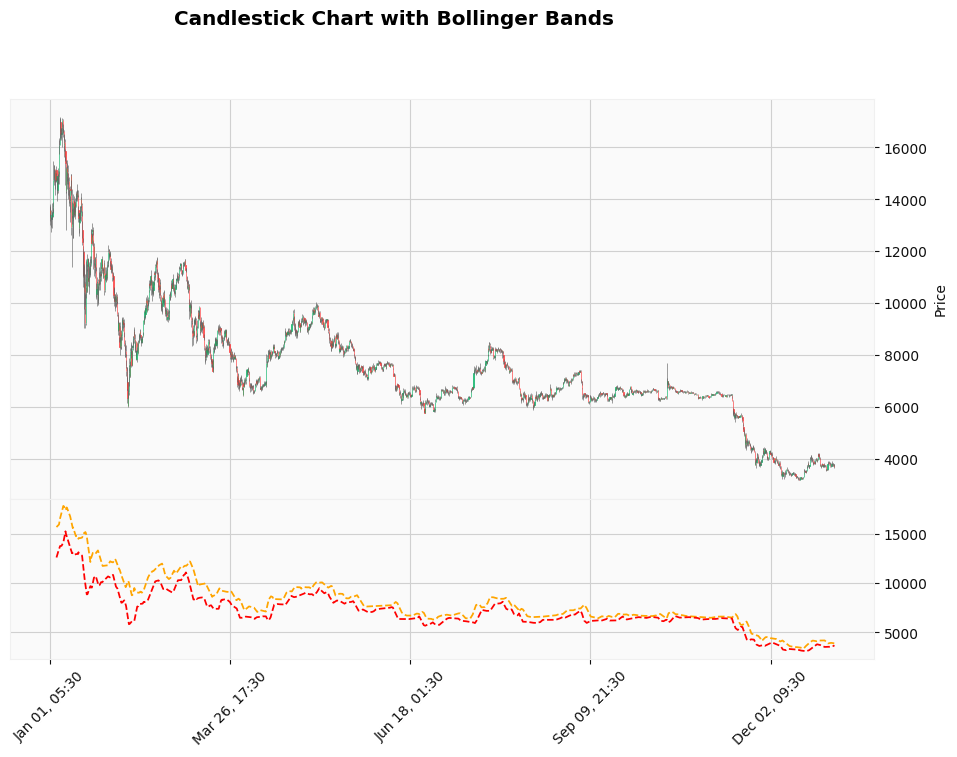

In [48]:
class BollingerPlotter:
    def __init__(self, data, window=20):
        self.df = pd.DataFrame(data)
        self.df.set_index('datetime', inplace=True)
        self.window = window
        self.calculate_bollinger_bands()

    def calculate_bollinger_bands(self):
        self.df['20MA'] = self.df['close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA'] + 2 * self.df['close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA'] - 2 * self.df['close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self, title='Candlestick Chart with Bollinger Bands', style='yahoo', figsize=(12, 8)):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=title, style=style, figsize=figsize)

# Assuming df1 is already defined and has a 'datetime' column
# If not, you can create a DataFrame like this: df1 = pd.DataFrame(your_data)

bollinger_plotter = BollingerPlotter(df1)
bollinger_plotter.plot_candlestick_chart()

**Interpretation**


*   Here, BTC/USDT prices are consistently in the range with the Upper Bollinger Band, and the Lower Bollinger Band is below the Upper Band, it could indicate a strong uptrend.

*   The market is displaying bullish momentum, and prices are consistently pushing towards the upper limit.



*   The narrow distance between the Upper and Lower Bollinger Bands suggests relatively low volatility, as the price remains within a defined range.

*   This is consistent with a trending market where the price is making consistent upward movements.





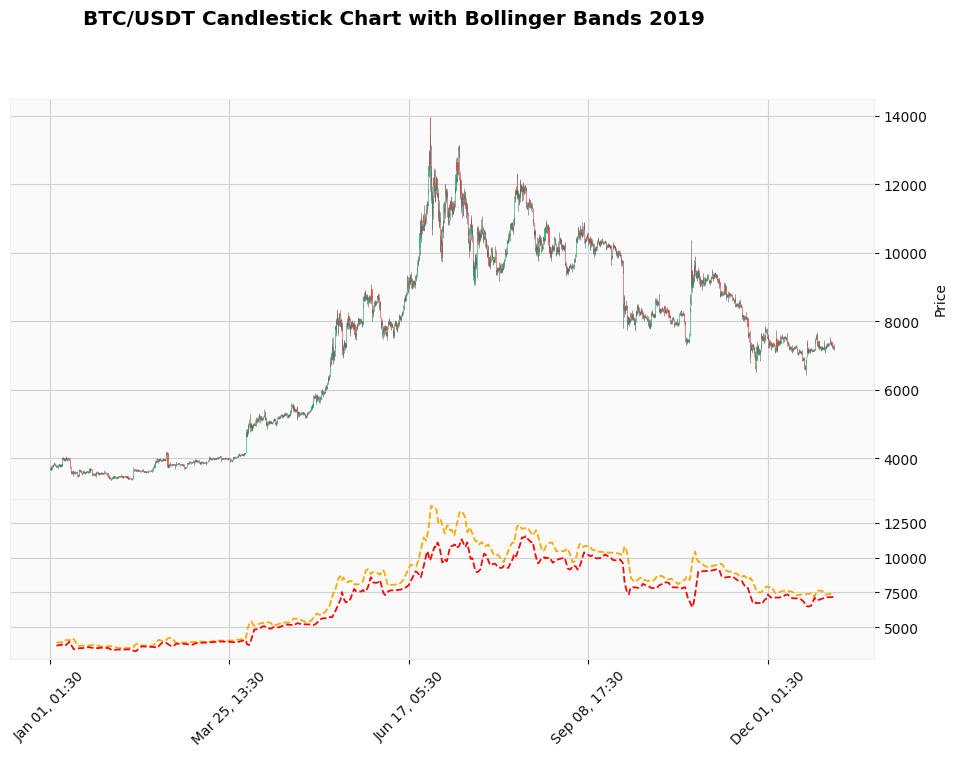

In [49]:
class BollingerPlotter:
    def __init__(self, data, window=20, title='Candlestick Chart with Bollinger Bands', style='yahoo', figsize=(12, 8)):
        self.df = pd.DataFrame(data)
        self.df.set_index('datetime', inplace=True)
        self.window = window
        self.title = title
        self.style = style
        self.figsize = figsize
        self.calculate_bollinger_bands()

    def calculate_bollinger_bands(self):
        self.df['20MA'] = self.df['close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA'] + 2 * self.df['close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA'] - 2 * self.df['close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=self.title, style=self.style, figsize=self.figsize)

# Assuming df2 is already defined and has a 'datetime' column
# If not, you can create a DataFrame like this: df2 = pd.DataFrame(your_data)

bollinger_plotter = BollingerPlotter(df2, title='BTC/USDT Candlestick Chart with Bollinger Bands 2019')
bollinger_plotter.plot_candlestick_chart()

**Interpretation**


*   In 2019, there is an increase of price in between the months april to november.
*   Again, here, The narrow distance between the Upper and Lower Bollinger Bands suggests relatively low volatility, as the price remains within a defined range.

*   The fact that the Lower Bollinger Band is not frequently reached or breached might suggest that the market is not experiencing significant pullbacks or corrections.





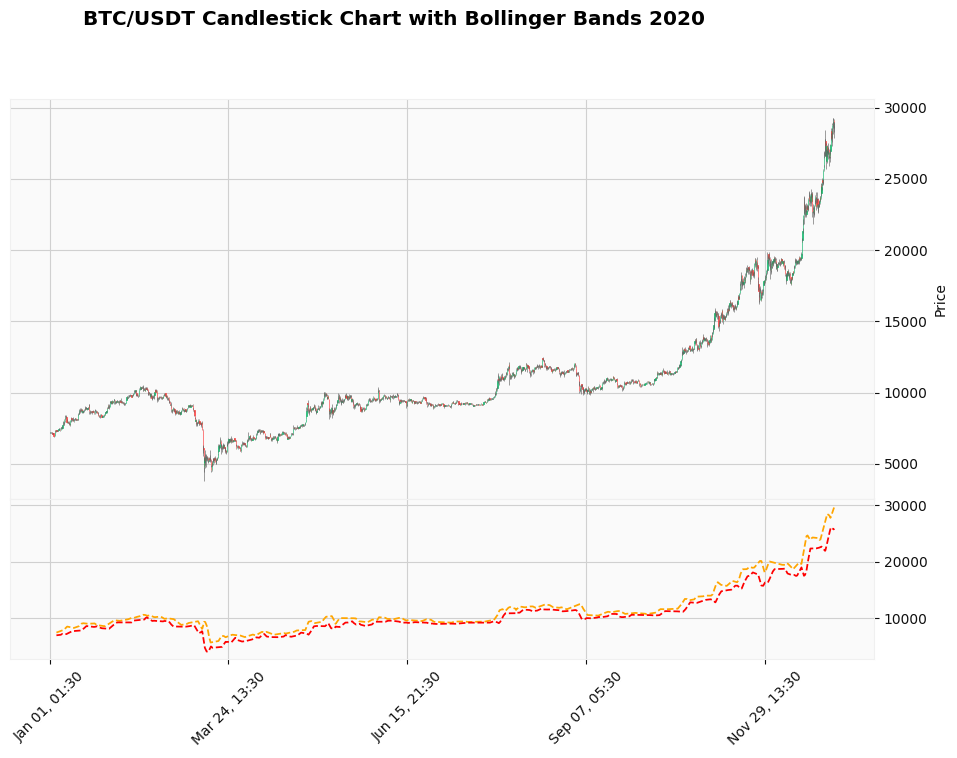

In [50]:
import pandas as pd
import mplfinance as mpf

class BollingerPlotter:
    def __init__(self, data, window=20, title='', style='yahoo', figsize=(12, 8)):
        self.df = pd.DataFrame(data)
        self.df.set_index('datetime', inplace=True)
        self.window = window
        self.title = title
        self.style = style
        self.figsize = figsize
        self.calculate_bollinger_bands()

    def calculate_bollinger_bands(self):
        self.df['20MA'] = self.df['close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA'] + 2 * self.df['close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA'] - 2 * self.df['close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=self.title, style=self.style, figsize=self.figsize)

# Assuming df3 is already defined and has a 'datetime' column
# If not, you can create a DataFrame like this: df3 = pd.DataFrame(your_data)

bollinger_plotter = BollingerPlotter(df3, title='BTC/USDT Candlestick Chart with Bollinger Bands 2020')
bollinger_plotter.plot_candlestick_chart()


**Interpretation**


*   The BTC/USDT price was continuously increasing from jan to dec.

*   The fact that the BTC/USDT price is consistently increasing indicates a prevailing bullish trend. This could be driven by a variety of factors such as positive sentiment, increased adoption, institutional interest, or favorable market conditions.

*   The continuous upward movement with the bands moving in tandem may indicate that market participants are confident in the ongoing trend.

*   When both the upper and lower Bollinger Bands move together, it suggests that the market is experiencing low volatility relative to the average price movement.





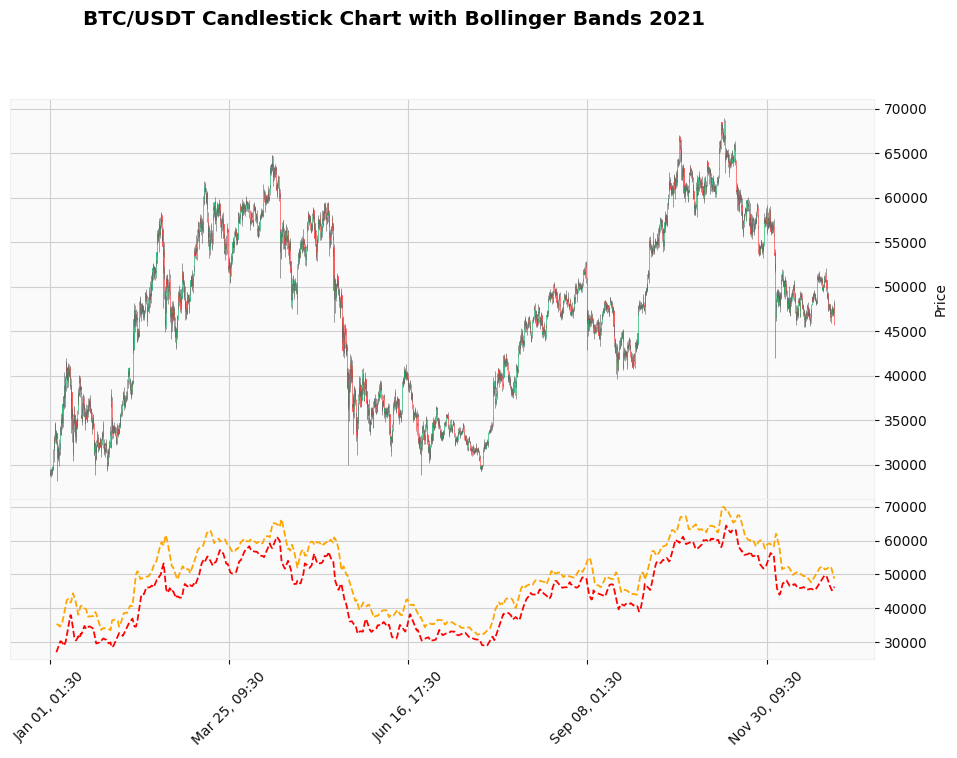

In [51]:
import pandas as pd
import mplfinance as mpf

class BollingerPlotter:
    def __init__(self, data, window=20, title='', style='yahoo', figsize=(12, 8)):
        self.df = pd.DataFrame(data)
        self.df.set_index('datetime', inplace=True)
        self.window = window
        self.title = title
        self.style = style
        self.figsize = figsize
        self.calculate_bollinger_bands()

    def calculate_bollinger_bands(self):
        self.df['20MA'] = self.df['close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA'] + 2 * self.df['close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA'] - 2 * self.df['close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=self.title, style=self.style, figsize=self.figsize)

# Assuming df4 is already defined and has a 'datetime' column
# If not, you can create a DataFrame like this: df4 = pd.DataFrame(your_data)

bollinger_plotter = BollingerPlotter(df4, title='BTC/USDT Candlestick Chart with Bollinger Bands 2021')
bollinger_plotter.plot_candlestick_chart()


**Interpretation**


*   In 2021, there was an increase of price between feb to march. But it dropped in june. Positive news, developments, or increased interest in the market would have driven prices higher.
*   The price sarted increasing from mid-june and went on increasing till dec.

*   Again, here, The narrow distance between the Upper and Lower Bollinger Bands suggests relatively low volatility, as the price remains within a defined range.





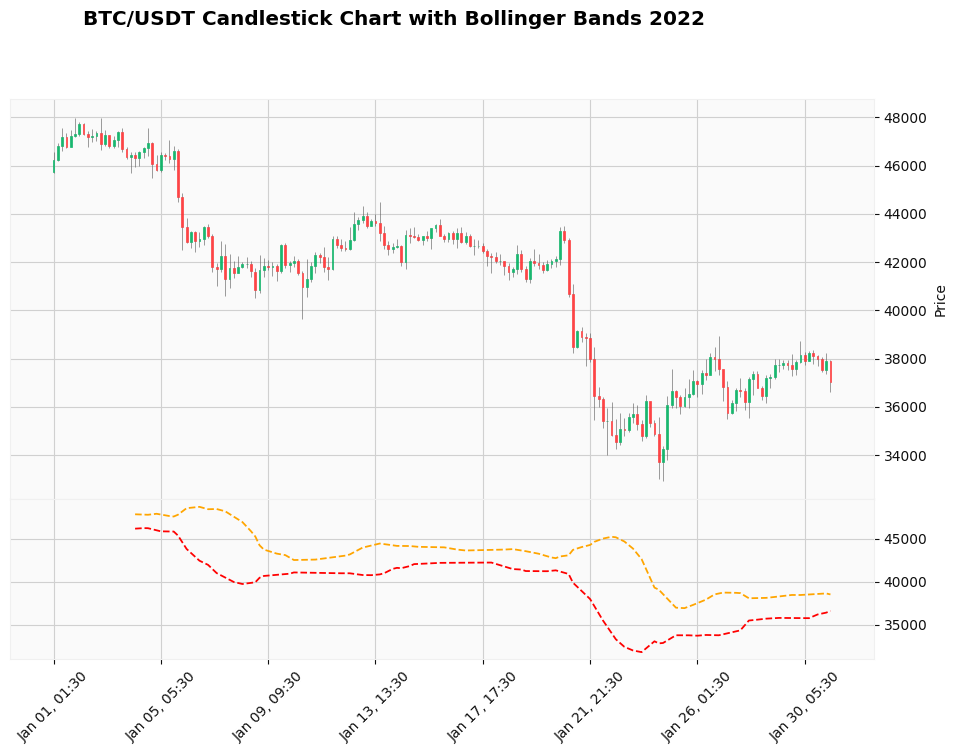

In [52]:
import pandas as pd
import mplfinance as mpf

class BollingerPlotter:
    def __init__(self, data, window=20, title='', style='yahoo', figsize=(12, 8)):
        self.df = pd.DataFrame(data)
        self.df.set_index('datetime', inplace=True)
        self.window = window
        self.title = title
        self.style = style
        self.figsize = figsize
        self.calculate_bollinger_bands()

    def calculate_bollinger_bands(self):
        self.df['20MA'] = self.df['close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA'] + 2 * self.df['close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA'] - 2 * self.df['close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=self.title, style=self.style, figsize=self.figsize)

# Assuming df5 is already defined and has a 'datetime' column
# If not, you can create a DataFrame like this: df5 = pd.DataFrame(your_data)

bollinger_plotter = BollingerPlotter(df5, title='BTC/USDT Candlestick Chart with Bollinger Bands 2022')
bollinger_plotter.plot_candlestick_chart()


**Interpretation**


*   In 2022, the BCT/USDT prices are decreasing from 48,000 to 36,000 from Jan1 to Jan30.

*   If the upper and lower Bollinger Bands are moving away from each other, it indicates an increase in market volatility.

*   Expanding bands suggest that price movements are becoming more dynamic, and the market may be experiencing increased uncertainty.





In [53]:
df = df.drop('year',axis=1)

In [54]:
df.set_index('datetime', inplace=True)

In [55]:
df['Daily_Return'] = df['close'].pct_change()
df['Rolling_Std'] = df['Daily_Return'].rolling(window=20).std()

In [56]:
avg_daily_return = df['Daily_Return'].mean()
std_dev = df['Daily_Return'].std()

In [57]:
df['Daily_Return'].fillna(df['Daily_Return'].mean(), inplace=True)
df['Rolling_Std'].fillna(df['Rolling_Std'].mean(), inplace=True)

In [58]:
df.isna().sum()

open            0
high            0
low             0
close           0
volume          0
Daily_Return    0
Rolling_Std     0
dtype: int64

In [59]:
avg_daily_return = df['Daily_Return'].mean()
std_dev = df['Daily_Return'].std()

In [60]:
sharpe_ratio = avg_daily_return / std_dev

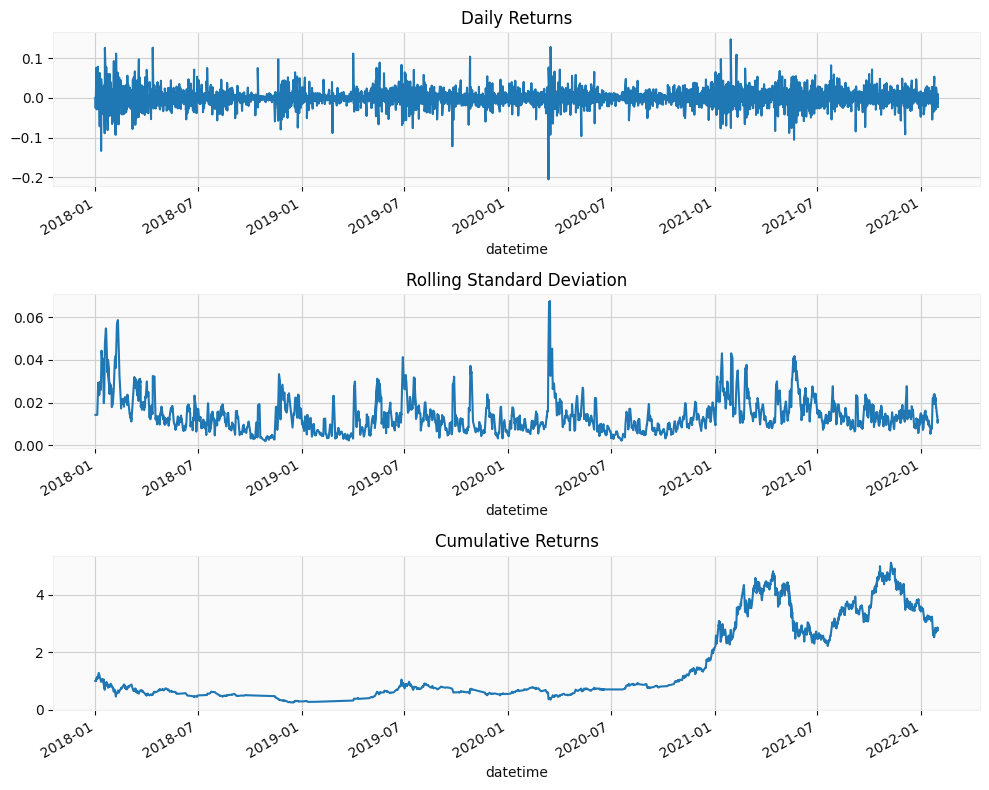

Sharpe Ratio: 0.015179821590847182


In [61]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Plot Daily Returns
df['Daily_Return'].plot(ax=axes[0], title='Daily Returns')

# Plot Rolling Standard Deviation
df['Rolling_Std'].plot(ax=axes[1], title='Rolling Standard Deviation')

# Plot Cumulative Returns
(df['Daily_Return'] + 1).cumprod().plot(ax=axes[2], title='Cumulative Returns')

plt.tight_layout()
plt.show()

print(f"Sharpe Ratio: {sharpe_ratio}")



*   The daily returns are mostly within the range of -0.1 to 0.1. This indicates that, on most days, the price changes are relatively small, with the asset not experiencing large daily percentage gains or losses.
*   The rolling standard deviation of daily returns varies between 0.01 and 0.06. This suggests that the volatility of the asset, as measured by the standard deviation of its daily returns, fluctuates within this range over time. Lower values indicate periods of lower volatility, while higher values suggest increased volatility.


*   Cumulative returns start from 0 and gradually increase, reaching a range of 0 to 1 until September 29, 2020, at 21:30. After this point, there is a sudden increase in cumulative returns. This sudden increase might indicate a significant positive price movement or a notable event affecting the asset's value.
*   The range of 0 to 1 in cumulative returns implies a percentage change from the starting point. A value of 1 would represent a 100% return, indicating that the asset has doubled in value from the beginning of the observed period.





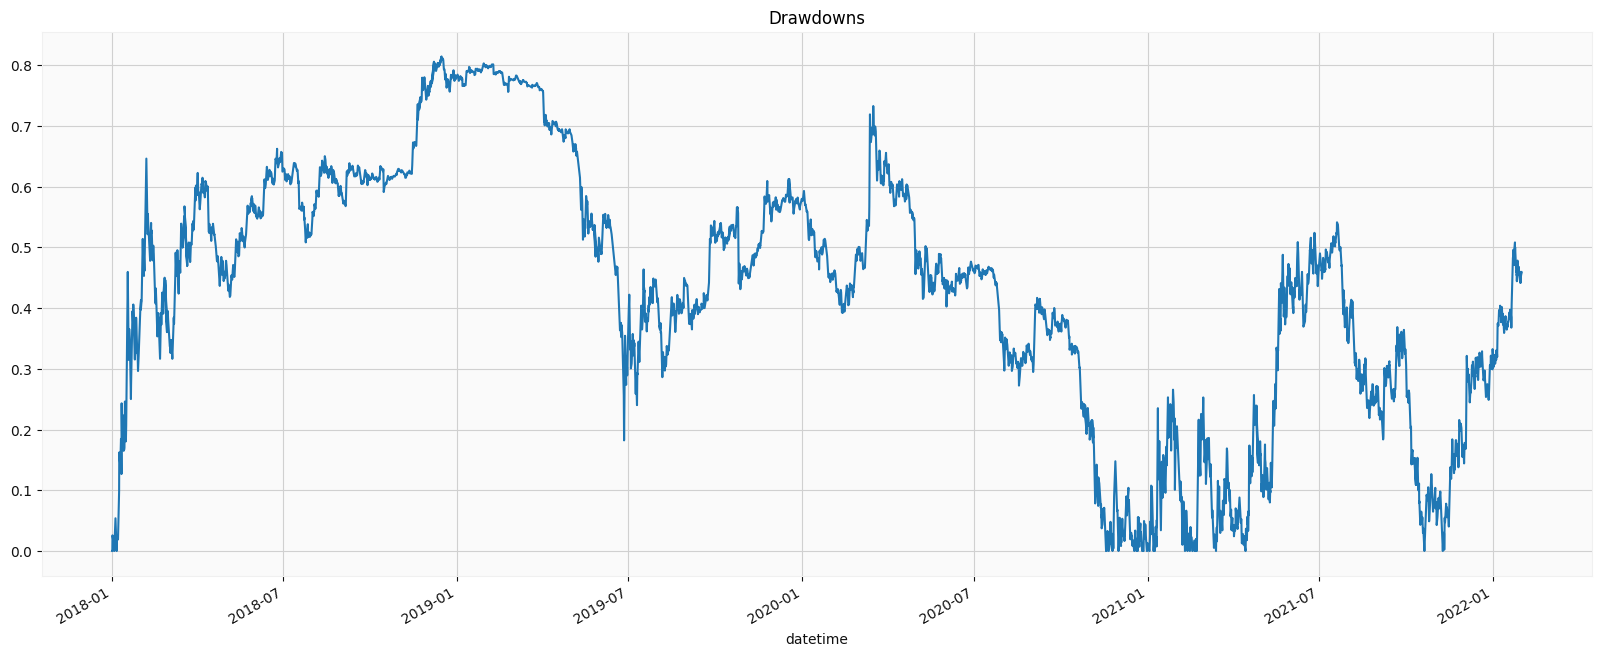

In [62]:
plt.figure(figsize=(20, 8))
df['Cumulative_Return'] = (df['Daily_Return'] + 1).cumprod()
df['Drawdown'] = 1 - df['Cumulative_Return'] / df['Cumulative_Return'].cummax()
df['Drawdown'].plot(title='Drawdowns')
plt.show()


**2018-01 to 2018-12:**
In the month of january the drawdown started increasing from 0.0 to 0.5, indicating that there was there was a substantial peak-to-trough decline in the value of the portfolio. Till decemeber 2018, it kept increasing and went on to the highest drawdown that is 0.8, indicating a challenging market environment or a period of unfavorable performance for the trading strategy.

**2018-12 to 2019-11:**
There was a decrease in drawdown between these months from 0.8 to 0.3, indicating an improvement in the portfolio's performance.The strategy might have experienced a recovery or a period of reduced losses during this time, leading to a decrease in drawdown.

**2019-11 to 2020-09:**
Another decrease in drawdown from 0.3 to 0.1 suggests further improvement in the portfolio's performance. The strategy might have adapted or performed well during this period, resulting in a reduction in drawdown.

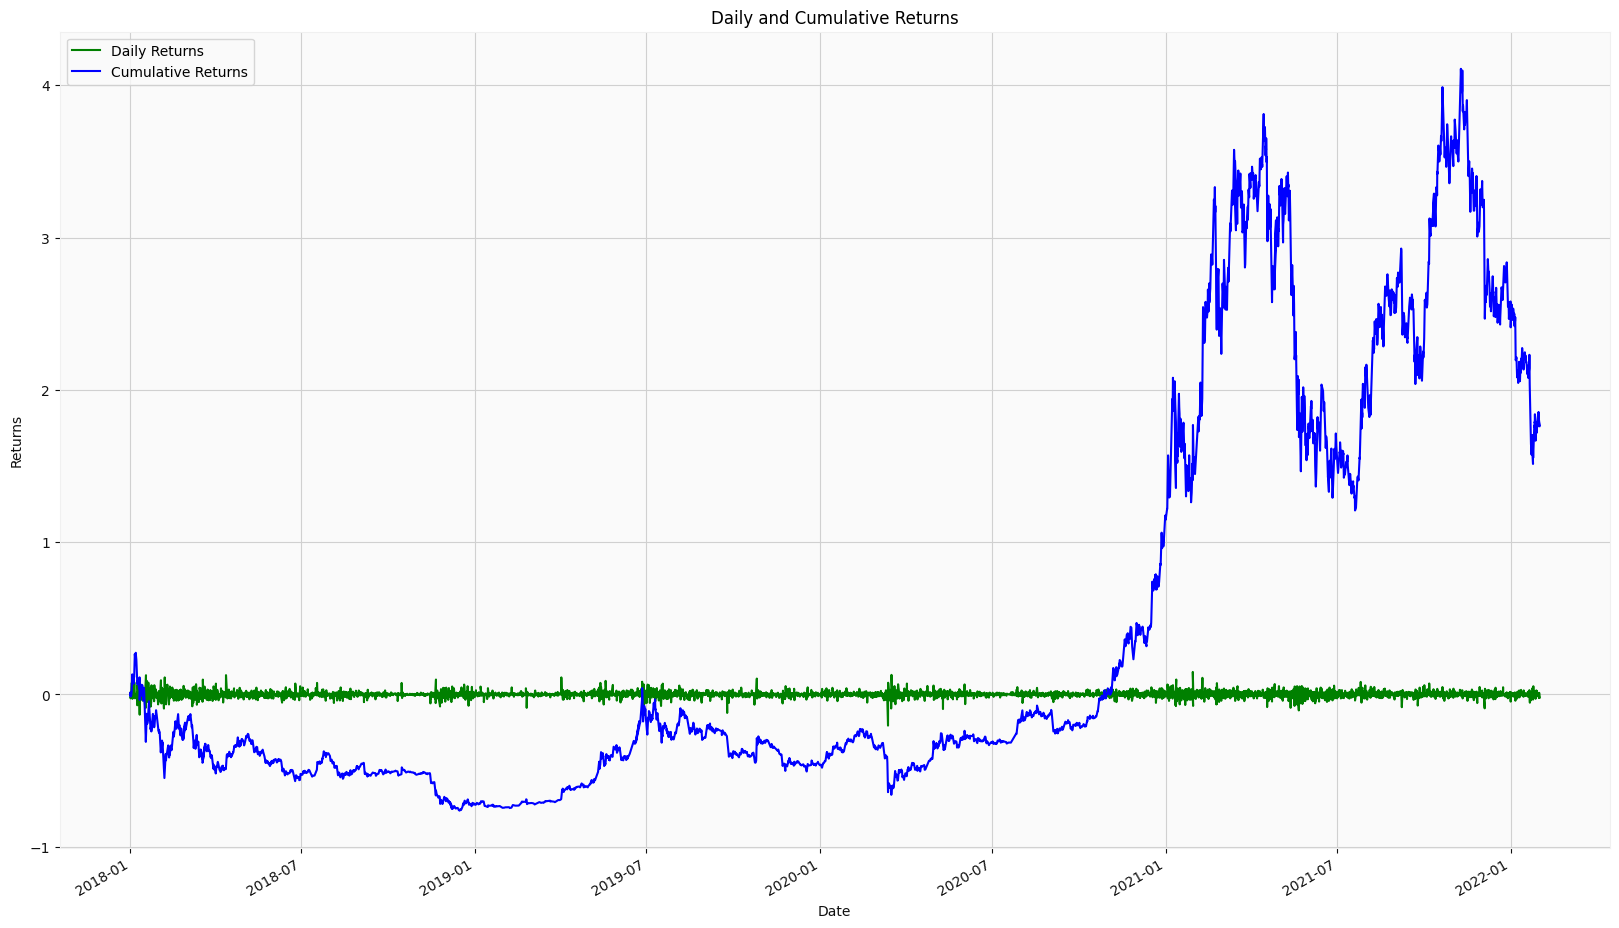

In [63]:
plt.figure(figsize=(20, 12))

# Plot Daily Returns
df['Daily_Return'].plot(color='green', label='Daily Returns')

# Plot Cumulative Returns
(df['Cumulative_Return'] - 1).plot(color='blue', label='Cumulative Returns')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily and Cumulative Returns')
plt.legend()
plt.show()

**Here, the strategy might not be generating high return in an interval of 4 hours, but definitly the cumulative effect over time is substantial. This could be due to the compounding effect of consistently positive returns or a more significant positive trend during that period.**

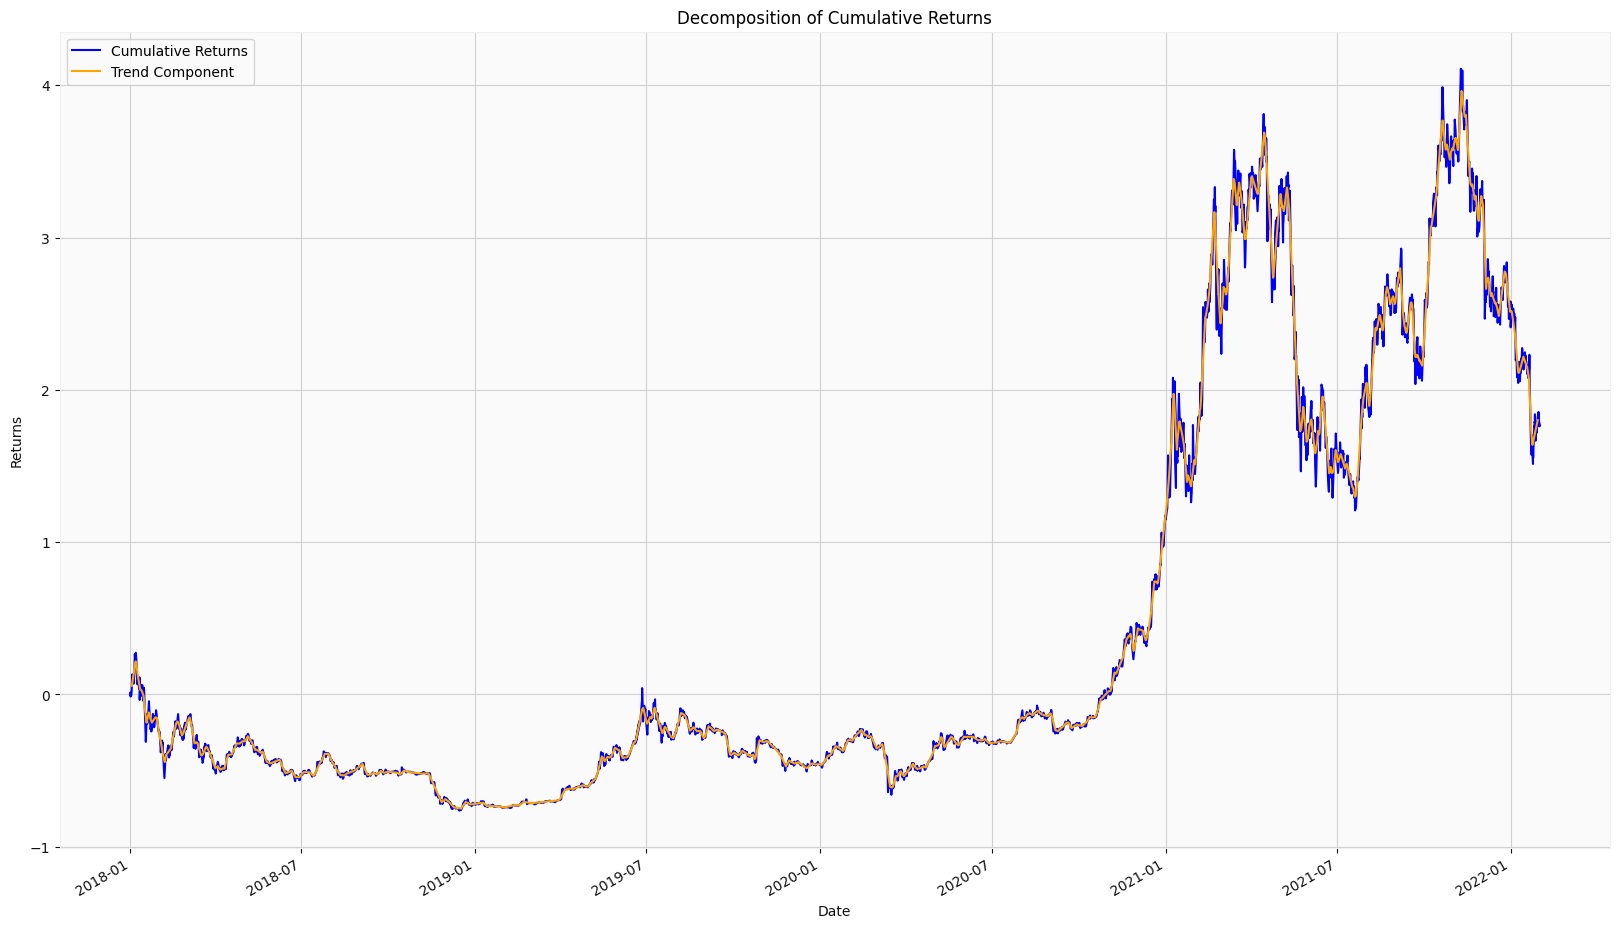

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure there are no missing values in 'Cumulative_Return'
df['Cumulative_Return'] = df['Cumulative_Return'].fillna(method='bfill')

# Decompose Cumulative Returns (use model='additive' instead of 'multiplicative')
decomposition = seasonal_decompose(df['Cumulative_Return'] - 1, model='additive', period=20)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 12))

# Plot Cumulative Returns
(df['Cumulative_Return'] - 1).plot(color='blue', label='Cumulative Returns')

# Plot Trend Component
trend.plot(color='orange', label='Trend Component')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Decomposition of Cumulative Returns')
plt.legend()
plt.show()



**Here, trend component and the cumulative returns appear to be closely aligned or going together in the decomposition plot, it suggests that the trend component is capturing the overall movement and trend in your cumulative returns.**

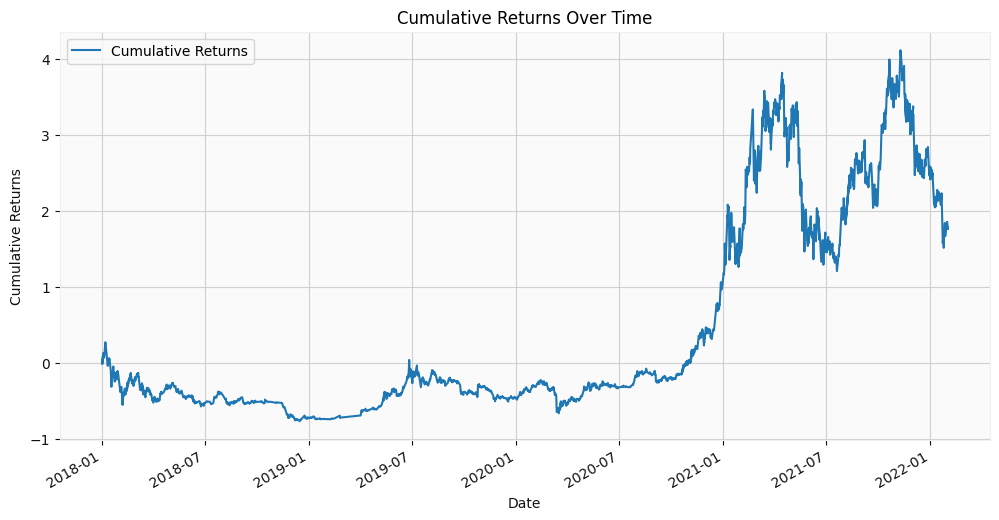

Annualized Return: 6.33%
Annualized Volatility: 26.27%
Sharpe Ratio: 0.2410


In [65]:
import numpy as np
returns = df['Daily_Return']

# Calculate performance metrics
cumulative_returns = (1 + returns).cumprod() - 1
annualized_return = np.mean(returns) * 252  # Assuming 252 trading days in a year
annualized_volatility = np.std(returns) * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

# Visualize cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot(label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()

# Display performance metrics
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

**Interpretation**


*   The Annualized Return of 6.33% indicates the average annual profit or loss on the investment.
*   The Annualized Volatility of 26.27% implies a moderate level of risk or price fluctuation in the investment.

*   The Sharpe Ratio of 0.2410 suggests that the investment has provided a modest excess return relative to its risk, as the ratio is positive.

Let's try to increase the value of Sharpe Ratio, so that data operates on risk well.



open :


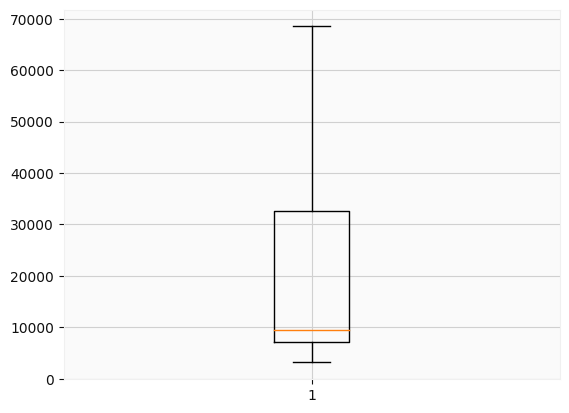

high :


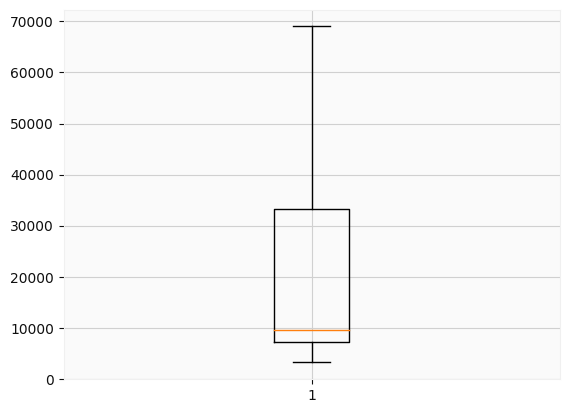

low :


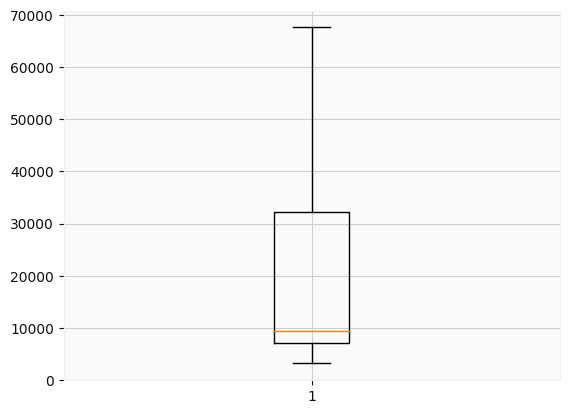

close :


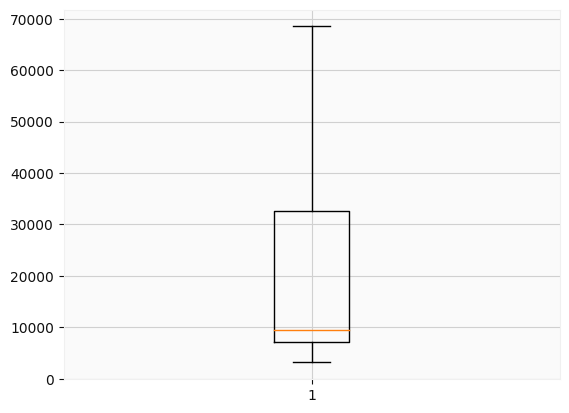

volume :


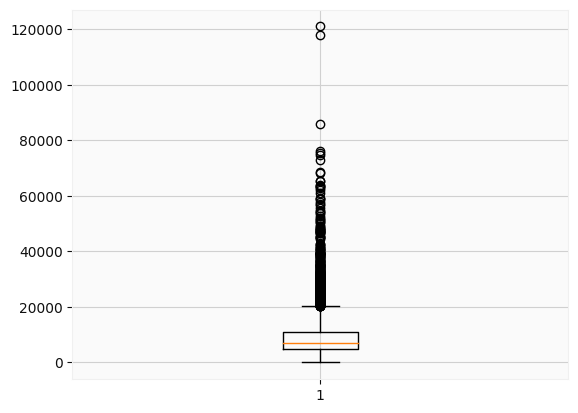

Daily_Return :


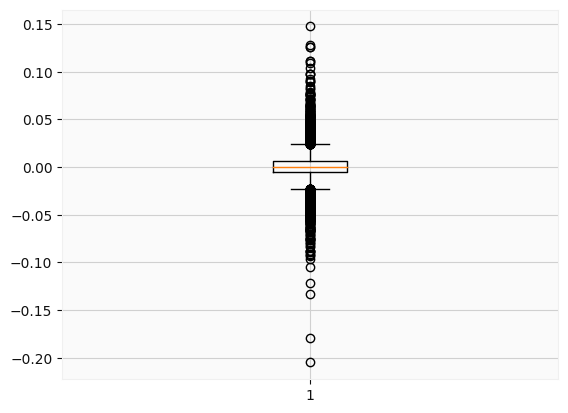

Rolling_Std :


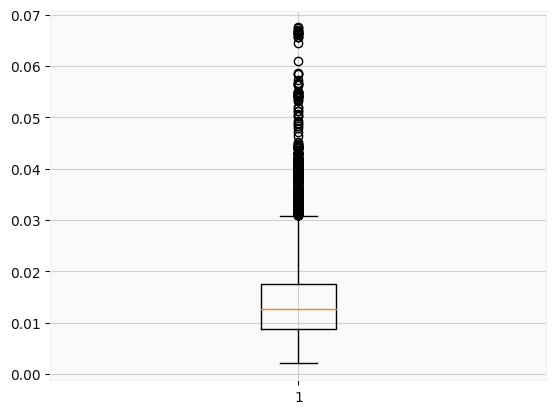

Cumulative_Return :


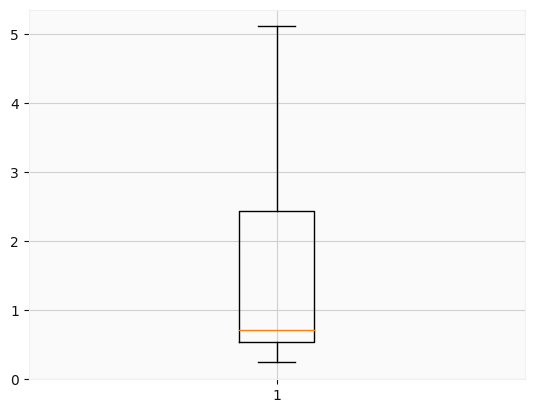

Drawdown :


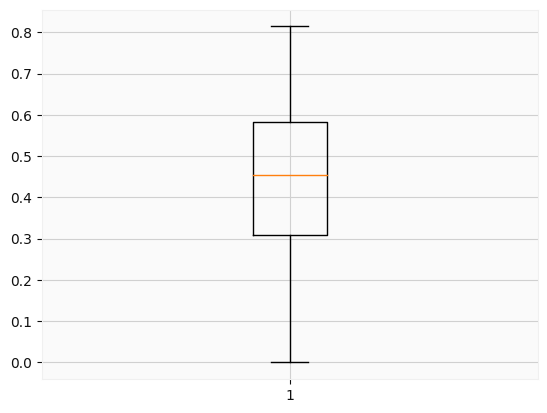

In [66]:
for i in df.columns:
  print(i,':')
  plt.boxplot(df[i])
  plt.show()

In [67]:
Q3 = df['volume'].quantile(q=0.75)
Q1 = df['volume'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['volume'], down, up)
df['volume'] = a

In [68]:
Q3 = df['Daily_Return'].quantile(q=0.75)
Q1 = df['Daily_Return'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['Daily_Return'], down, up)
df['Daily_Return'] = b

In [69]:
Q3 = df['Rolling_Std'].quantile(q=0.75)
Q1 = df['Rolling_Std'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['Rolling_Std'], down, up)
df['Rolling_Std'] = c

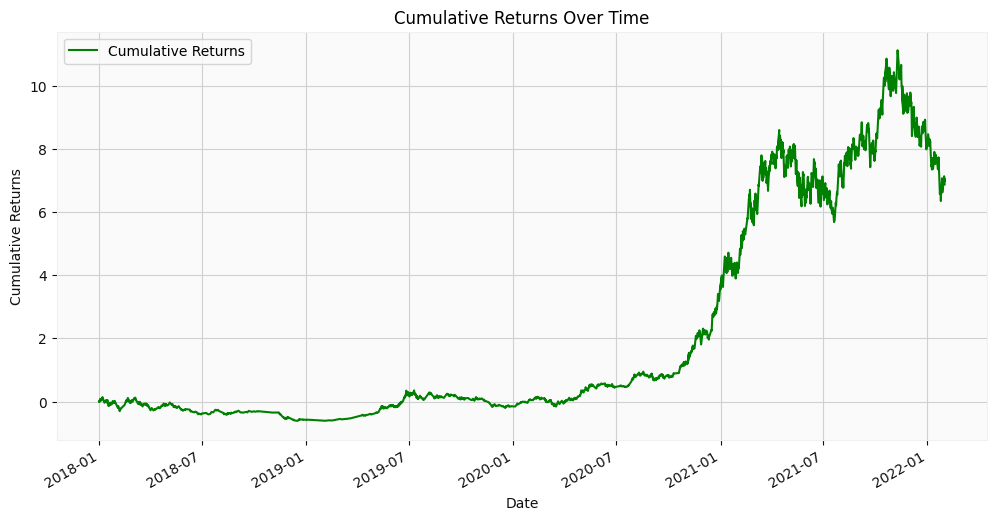

Annualized Return: 7.47%
Annualized Volatility: 18.13%
Sharpe Ratio: 0.4118


In [70]:
returns = df['Daily_Return']

# Calculate performance metrics
cumulative_returns = (1 + returns).cumprod() - 1
annualized_return = np.mean(returns) * 252  # Assuming 252 trading days in a year
annualized_volatility = np.std(returns) * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

# Visualize cumulative returns with a different color (e.g., green)
plt.figure(figsize=(12, 6))
cumulative_returns.plot(label='Cumulative Returns', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()

# Display performance metrics
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

**Interpretation**

*   The Annualized Return of 7.47% reflects a slightly improved average annual profit or loss compared to the previous period.

*   The Annualized Volatility of 18.13% signals a reduction in the level of risk or price fluctuation associated with the investment.


*   The Sharpe Ratio of 0.4118 indicates a more favorable risk-adjusted return compared to the previous value. The investment is now providing a better excess return relative to its risk.





In [71]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Daily_Return', 'Rolling_Std',
       'Cumulative_Return', 'Drawdown'],
      dtype='object')

In [72]:
risk_per_trade = 0.02  # 2% risk per trade
take_profit_multiplier = 1.5  # 1.5 times the risk for take-profit

# Calculate entry prices based on your strategy (e.g., using close prices)
df['entry_price'] = df['close']

# Calculate stop-loss prices based on your strategy (e.g., using rolling standard deviation)
df['stop_loss_price'] = df['close'] - df['Rolling_Std']

# Calculate take-profit prices based on your strategy (e.g., using close prices and a multiplier)
df['take_profit_price'] = df['entry_price'] + (df['stop_loss_price'] - df['entry_price']) * take_profit_multiplier

# Define a function to calculate risk-reward ratio
def calculate_risk_reward_ratio(row):
    potential_risk = row['entry_price'] - row['stop_loss_price']
    potential_reward = row['take_profit_price'] - row['entry_price']

    if potential_risk == 0:
        return None

    return potential_reward / potential_risk

# Apply the function to calculate risk-reward ratio for each row
df['risk_reward_ratio'] = df.apply(calculate_risk_reward_ratio, axis=1)

# Display the DataFrame with relevant columns
df[['entry_price', 'stop_loss_price', 'take_profit_price', 'risk_reward_ratio']]

,entry_price,stop_loss_price,take_profit_price,risk_reward_ratio
datetime,,,,
2018-01-01 05:30:00,13410.03,13410.015697,13410.008546,-1.5
2018-01-01 09:30:00,13570.35,13570.335697,13570.328546,-1.5
2018-01-01 13:30:00,13220.56,13220.545697,13220.538546,-1.5
2018-01-01 17:30:00,13247.00,13246.985697,13246.978546,-1.5
2018-01-01 21:30:00,13240.37,13240.355697,13240.348546,-1.5
...,...,...,...,...
2022-01-30 13:30:00,38110.02,38110.009307,38110.003960,-1.5
2022-01-30 17:30:00,37980.09,37980.079414,37980.074121,-1.5
2022-01-30 21:30:00,37512.37,37512.359285,37512.353927,-1.5


In [73]:
df['risk_reward_ratio'].unique()

array([-1.5, -1.5, -1.5, ..., -1.5, -1.5, -1.5])

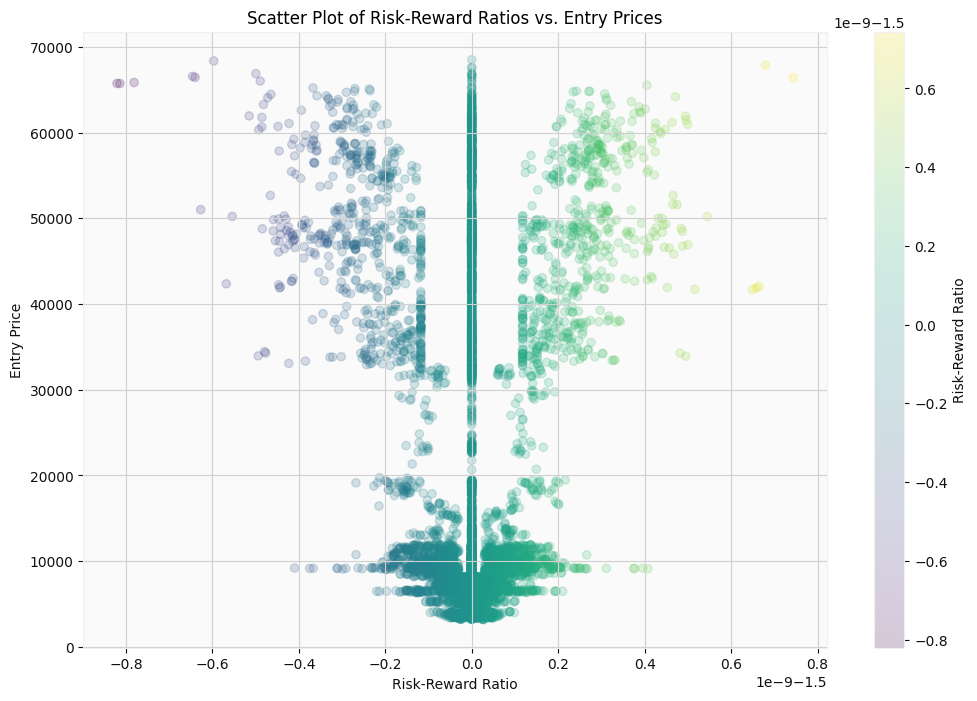

In [74]:
alpha_value = 0.2

# Scatter plot with color gradient
plt.figure(figsize=(12, 8))
sc = plt.scatter(
    df['risk_reward_ratio'], df['entry_price'], c=df['risk_reward_ratio'], cmap='viridis', alpha=alpha_value
)

# Add labels and title
plt.xlabel('Risk-Reward Ratio')
plt.ylabel('Entry Price')
plt.title('Scatter Plot of Risk-Reward Ratios vs. Entry Prices')

# Add colorbar legend
colorbar = plt.colorbar(sc)
colorbar.set_label('Risk-Reward Ratio')

# Show the plot
plt.show()

**Interpretation**


*   This trading strategy is particularly active or frequently initiates trades within the range of 0 to 10,000.


*   The risk-reward ratios being in the range of -0.2 to 0.2 suggest that your strategy tends to have relatively conservative risk-reward ratios for the trades within this price range. This could imply that the strategy is designed to prioritize lower risk at the expense of potentially lower returns.









#**Feature Engineering and Data Cleaning**

In [ ]:
df = df.drop(['Daily_Return','Rolling_Std','Cumulative_Return','Drawdown','entry_price','stop_loss_price','take_profit_price','risk_reward_ratio'],axis=1)

In [ ]:
df['percentage_change'] = df['close'].pct_change() * 100
df = df.dropna()

In [ ]:
df['short_ema'] = df.close.ewm(span=12, adjust = False).mean()

#long term exponential moving avg (ema)
df['long_ema'] = df.close.ewm(span = 26, adjust =  False).mean()
df['MACD'] =  df['short_ema'] - df['long_ema']
df.head()

,open,high,low,close,volume,percentage_change,short_ema,long_ema,MACD
datetime,,,,,,,,,
2018-01-01 09:30:00,13434.98,13818.55,13322.15,13570.35,1302.214836,1.195523,13570.350000,13570.350000,0.000000
2018-01-01 13:30:00,13569.98,13735.24,13001.13,13220.56,1319.755931,-2.577605,13516.536154,13544.439630,-27.903476
2018-01-01 17:30:00,13220.56,13330.00,12750.00,13247.00,1831.933153,0.199992,13475.069053,13522.407064,-47.338011
2018-01-01 21:30:00,13247.00,13290.65,12940.00,13240.37,1092.337234,-0.050049,13438.961507,13501.515430,-62.553923
2018-01-02 01:30:00,13222.03,13599.70,13222.03,13380.00,1387.469883,1.054578,13429.890506,13492.514287,-62.623782


open :


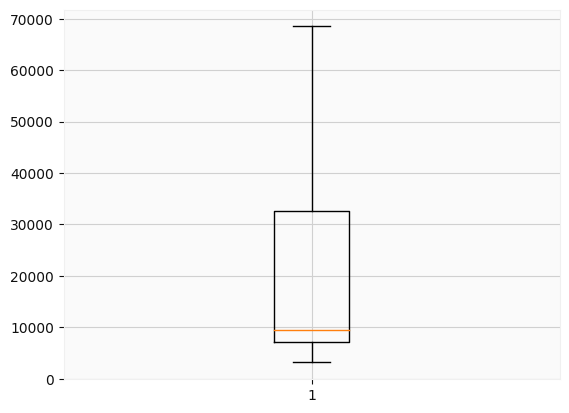

high :


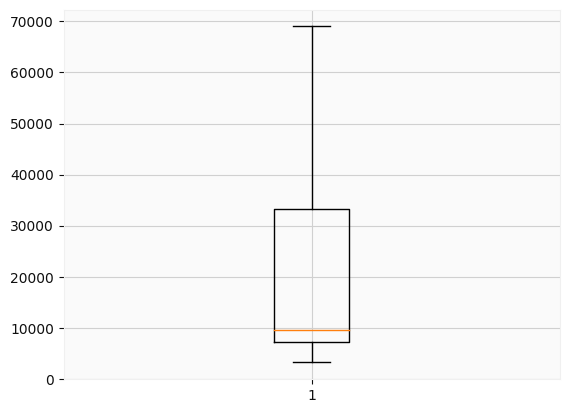

low :


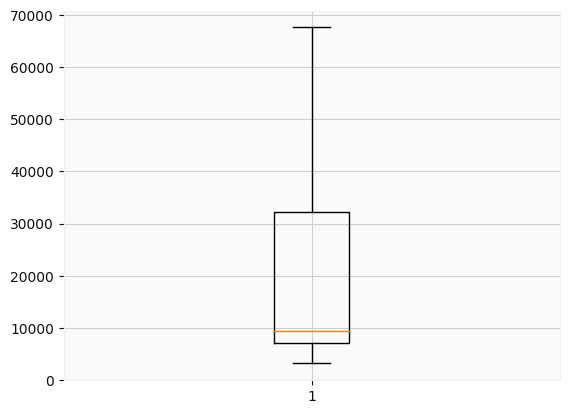

close :


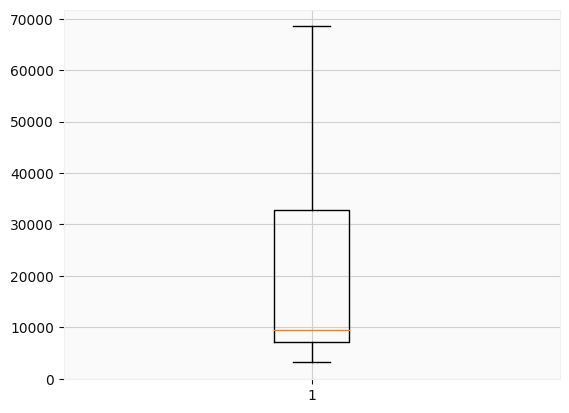

volume :


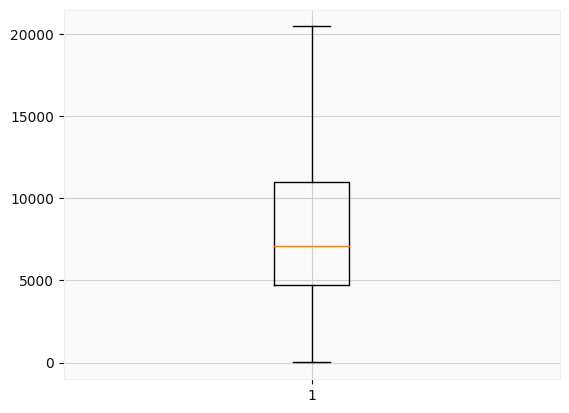

percentage_change :


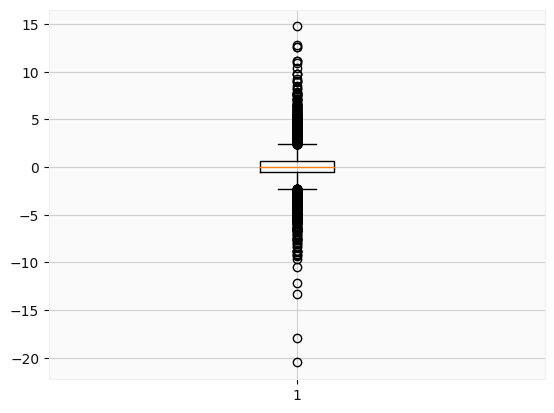

short_ema :


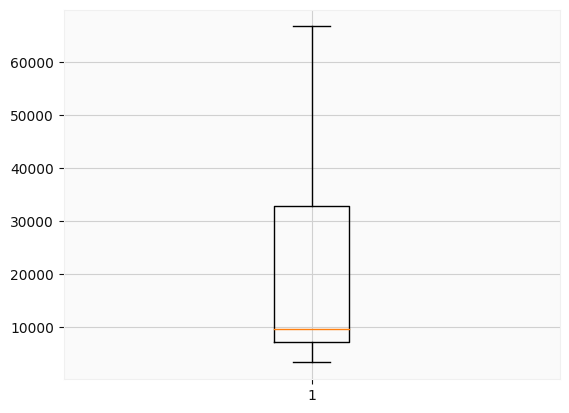

long_ema :


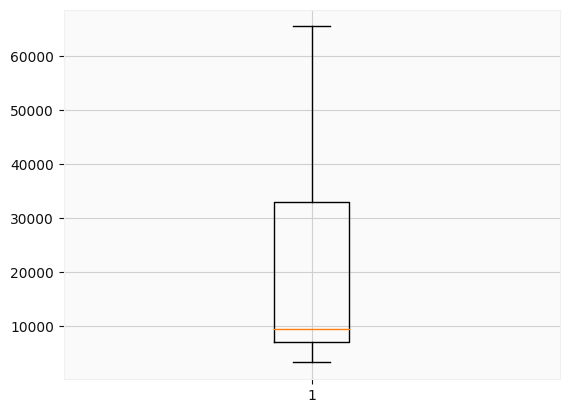

MACD :


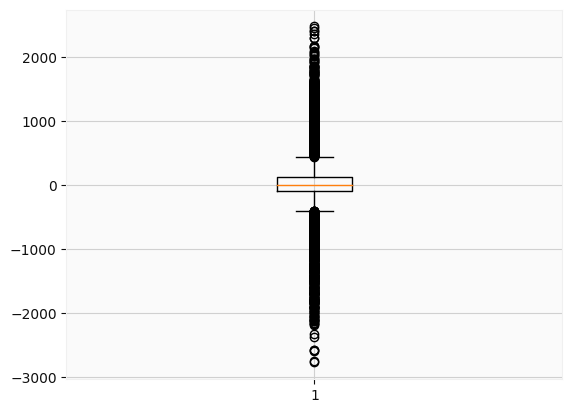

In [ ]:
for i in df.columns:
  print(i,':')
  plt.boxplot(df[i])
  plt.show()

In [ ]:
Q3 = df['percentage_change'].quantile(q=0.75)
Q1 = df['percentage_change'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

j = cap_extreme_values(df['percentage_change'], down, up)
df['percentage_change'] = j

In [ ]:
Q3 = df['MACD'].quantile(q=0.75)
Q1 = df['MACD'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

k = cap_extreme_values(df['MACD'], down, up)
df['MACD'] = k

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with time series data (open, high, low, close, volume, percentage_change, PCT_log, 'close_squared')

# Extract the features for standardization
features_to_standardize = ['open', 'high', 'low', 'close', 'volume', 'percentage_change', 'short_ema', 'long_ema', 'MACD']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the data and transform the features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Display the standardized DataFrame
df.head()

,open,high,low,close,volume,percentage_change,short_ema,long_ema,MACD
datetime,,,,,,,,,
2018-01-01 09:30:00,-0.300699,-0.288225,-0.297220,-0.293256,-1.422842,1.020672,-0.292758,-0.292099,-0.067393
2018-01-01 13:30:00,-0.293143,-0.292833,-0.315429,-0.312834,-1.419383,-2.049726,-0.295773,-0.293553,-0.188671
2018-01-01 17:30:00,-0.312702,-0.315245,-0.329673,-0.311355,-1.318388,0.149136,-0.298097,-0.294789,-0.273139
2018-01-01 21:30:00,-0.311222,-0.317421,-0.318896,-0.311726,-1.464228,-0.069762,-0.300120,-0.295961,-0.339273
2018-01-02 01:30:00,-0.312619,-0.300329,-0.302899,-0.303910,-1.406031,0.897282,-0.300629,-0.296466,-0.339576


In [ ]:
df['signal_line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['signal'] = 0  # Default to 0 for neutral

# Generate buy signals (when MACD crosses above Signal Line)
buy_signals = (df['MACD'] > df['signal_line'])
df.loc[buy_signals, 'signal'] = 2  # Set to 2 for buying

# Generate sell signals (when MACD crosses below Signal Line)
sell_signals = (df['MACD'] < df['signal_line'])
df.loc[sell_signals, 'signal'] = 1  # Set to 1 for selling

In [ ]:
df['signal'].value_counts()

2    4515
1    4414
0       1
Name: signal, dtype: int64

#**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = df[['open', 'high', 'low', 'close', 'volume', 'percentage_change', 'short_ema', 'long_ema', 'MACD','signal_line']]
y = df['signal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classification model
svc_model = SVC(kernel='linear', C=0.4)  # You can choose different kernels (linear, rbf, poly, etc.)

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Predict the signals on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_str}")

Accuracy: 0.9641657334826428
Confusion Matrix:
[[  0   1   0]
 [  0 874  20]
 [  0  43 848]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.98      0.96       894
           2       0.98      0.95      0.96       891

    accuracy                           0.96      1786
   macro avg       0.64      0.64      0.64      1786
weighted avg       0.96      0.96      0.96      1786



In [ ]:
import plotly.figure_factory as ff

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotly: Confusion matrix as a heatmap
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=['Class 0', 'Class 1', 'Class 2'],
    y=['Class 0', 'Class 1', 'Class 2'],
    colorscale='Oranges',
    showscale=True
)

# Update layout
fig.update_layout(
    title='Confusion Matrix - Actual vs. Predicted',
    xaxis_title='Predicted',
    yaxis_title='Actual',
    width=800,
    height=600
)

# Show the figure
fig.show()

**Final Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_report_str}")

Accuracy: 0.961926091825308
Confusion Matrix:
[[  0   0   1]
 [  0 863  31]
 [  0  36 855]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      0.97      0.96       894
           2       0.96      0.96      0.96       891

    accuracy                           0.96      1786
   macro avg       0.64      0.64      0.64      1786
weighted avg       0.96      0.96      0.96      1786



In [ ]:

signals = y_pred

returns = np.array(y)

if len(signals) != len(returns):
    # Trim returns to match the length of signals
    returns = returns[:len(signals)]
    print("Returns trimmed to match the length of signals.")

# Simulate a basic trading strategy
position_returns = signals * returns

# Calculate the equity curve
equity_curve = np.cumprod(1 + position_returns)

# Calculate the maximum drawdown
def calculate_drawdown(equity_curve):
    peak = np.maximum.accumulate(equity_curve)
    drawdown = (peak - equity_curve) / peak
    return drawdown

def calculate_max_drawdown(equity_curve):
    drawdown = calculate_drawdown(equity_curve)
    max_drawdown = np.max(drawdown)
    return max_drawdown

# Calculate the Sharpe ratio
def calculate_sharpe_ratio(returns):
    sharpe_ratio = np.mean(returns) / np.std(returns)
    return sharpe_ratio


# Print the results
print(f"Equity Curve: {equity_curve}")
print(f"Maximum Drawdown: {calculate_max_drawdown(equity_curve)}")
print(f"Sharpe Ratio: {calculate_sharpe_ratio(returns)}")

Returns trimmed to match the length of signals.
Equity Curve: [1 2 4 ... 0 0 0]
Maximum Drawdown: 1.0608679435087156
Sharpe Ratio: 2.9790926693062243


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotly: Confusion matrix as a heatmap
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=['Class 0', 'Class 1', 'Class 2'],
    y=['Class 0', 'Class 1', 'Class 2'],
    colorscale='Greens',
    showscale=True
)

# Update layout
fig.update_layout(
    title='Confusion Matrix - Actual vs. Predicted',
    xaxis_title='Predicted',
    yaxis_title='Actual',
    width=800,
    height=600
)

# Show the figure
fig.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy}")

Accuracy: 0.9412094064949608


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotly: Confusion matrix as a heatmap
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=['Class 0', 'Class 1', 'Class 2'],
    y=['Class 0', 'Class 1', 'Class 2'],
    colorscale='Blues',
    showscale=True
)

# Update layout
fig.update_layout(
    title='Confusion Matrix - Actual vs. Predicted',
    xaxis_title='Predicted',
    yaxis_title='Actual',
    width=800,
    height=600
)

# Show the figure
fig.show()

**Among all these models, decision trees worked well on the data.**

#**Backtesting on Sample**

In [ ]:
new = pd.read_csv("/content/Sample1 (1).csv")

In [ ]:
new = new.set_index(pd.DatetimeIndex(new['date'].values))
new = new.drop('date',axis=1)
new.head()

,open,high,low,close,volume,percentage_change,short_ema,long_ema,MACD,signal_line,signal
2022-02-01 05:00:00,1.178122,1.170387,1.188646,1.174477,-0.510534,0.777179,1.170841,1.166067,0.182020,0.182020,0
2022-02-01 09:00:00,1.180681,1.218354,1.166262,1.155360,2.233676,-0.485157,1.167894,1.164644,0.139248,0.173466,1
2022-02-01 13:00:00,1.186729,1.204868,1.190424,1.214841,1.652843,1.644435,1.174571,1.167754,0.239306,0.186634,2
2022-02-01 17:00:00,1.235557,1.223822,1.208933,1.212128,2.062318,-0.041596,1.179802,1.170431,0.310975,0.211502,2
2022-02-01 21:00:00,1.180916,1.191208,1.196652,1.200475,0.060459,-0.280675,1.182432,1.172043,0.339585,0.237118,2


In [ ]:
new.isna().sum()

open                 0
high                 0
low                  0
close                0
volume               0
percentage_change    0
short_ema            0
long_ema             0
MACD                 0
signal_line          0
signal               0
dtype: int64

In [ ]:
X_new = new[['open', 'high', 'low', 'close', 'volume', 'percentage_change', 'short_ema', 'long_ema', 'MACD', 'signal_line']]
Y_new = new['signal'].values

# Make predictions on the sample data
predicted_signals = dt_classifier.predict(X_new)

# Evaluate accuracy on the new data
accuracy = accuracy_score(Y_new, predicted_signals)

print("Model accuracy on new data:", accuracy)

Model accuracy on new data: 0.964053919121318


In [ ]:
import pandas as pd

class MeanReversionStrategy:
    def __init__(self, initial_balance, lookback_window, entry_threshold, exit_threshold, stop_loss_percentage):
        self.position = 0  # 0: No position, 1: Short position, 2: Long position
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.trades = []
        self.lookback_window = lookback_window
        self.entry_threshold = entry_threshold
        self.exit_threshold = exit_threshold
        self.stop_loss_percentage = stop_loss_percentage

    def initialize_data(self, new, predicted_signals):
        self.data = new
        self.data['rolling_mean'] = self.data['close'].rolling(window=self.lookback_window).mean()
        self.data['rolling_std'] = self.data['close'].rolling(window=self.lookback_window).std()
        self.data['rolling_mean'] = self.data['rolling_mean'].fillna(method='bfill')
        self.data['rolling_std'] = self.data['rolling_std'].fillna(method='bfill')
        self.data['z_score'] = 0
        self.data['predicted_signal'] = predicted_signals

    def execute_strategy(self):
        for index, row in self.data.iterrows():
            if self.position == 0:
                rolling_std = max(1e-8, row['rolling_std'])  # Avoid division by zero
                self.data.at[index, 'z_score'] = (row['close'] - row['rolling_mean']) / rolling_std

                if self.data.at[index, 'predicted_signal'] == 1 and self.data.at[index, 'z_score'] > self.entry_threshold:
                    # Mean reversion: Predicted to sell, go short
                    self.enter_position('Short', row['close'], index)

                elif self.data.at[index, 'predicted_signal'] == 2 and self.data.at[index, 'z_score'] < -self.entry_threshold:
                    # Mean reversion: Predicted to buy, go long
                    self.enter_position('Long', row['close'], index)

            elif self.position == 1:
                rolling_std = max(1e-8, row['rolling_std'])  # Avoid division by zero
                self.data.at[index, 'z_score'] = (row['close'] - row['rolling_mean']) / rolling_std

                if self.data.at[index, 'predicted_signal'] == 0 or row['close'] >= self.stop_loss_price:
                    # Exit short position due to predicted reversal or stop-loss trigger
                    self.exit_position('Cover', row['close'], index)

            elif self.position == 2:
                rolling_std = max(1e-8, row['rolling_std'])  # Avoid division by zero
                self.data.at[index, 'z_score'] = (row['close'] - row['rolling_mean']) / rolling_std

                if self.data.at[index, 'predicted_signal'] == 0 or row['close'] <= self.stop_loss_price:
                    # Exit long position due to predicted reversal or stop-loss trigger
                    self.exit_position('Sell', row['close'], index)

    def enter_position(self, action, entry_price, index):
        if action == 'Short':
            self.position = 1
        elif action == 'Long':
            self.position = 2

        self.entry_price = entry_price
        self.position_size = self.balance / entry_price
        self.stop_loss_price = entry_price * (1 + self.stop_loss_percentage) if self.position == 1 else entry_price * (1 - self.stop_loss_percentage)
        self.balance -= self.position_size * entry_price
        self.trades.append((action, index, entry_price, self.position_size, self.stop_loss_price))

    def exit_position(self, action, exit_price, index):
        if self.position == 1:
            self.position = 0
            self.balance += self.position_size * exit_price
        elif self.position == 2:
            self.position = 0
            self.balance += self.position_size * exit_price
        self.trades.append((action, index, exit_price, self.position_size))

# Usage example:
initial_balance = 1000
lookback_window = 15
entry_threshold = 3.0
exit_threshold = 0.5
stop_loss_percentage = 1.0

# Assuming 'new' is your DataFrame and 'predicted_signals' is available
strategy = MeanReversionStrategy(initial_balance, lookback_window, entry_threshold, exit_threshold, stop_loss_percentage)
strategy.initialize_data(new, predicted_signals)
strategy.execute_strategy()

# Calculate final balance
final_balance = strategy.balance + strategy.position_size * strategy.data['close'].iloc[-1] if strategy.position in [1, 2] else strategy.balance

# Calculate profits or losses
profit_loss = final_balance - initial_balance

# Display results
print(f"Initial Balance: {initial_balance} USDT")
print(f"Final Balance: {final_balance} USDT")
print(f"Profit/Loss: {profit_loss} USDT")

# Display trades
trades_df = pd.DataFrame(strategy.trades, columns=['Action', 'Date', 'Price', 'Size', 'Stop-Loss Price'])
print("\nTrades:")
print(trades_df)


Initial Balance: 1000 USDT
Final Balance: 1006.0781075332853 USDT
Profit/Loss: 6.078107533285333 USDT

Trades:
  Action                Date     Price        Size  Stop-Loss Price
0   Long 2022-11-28 01:00:00 -1.112559 -898.829094        -0.000000
1   Sell 2022-11-28 05:00:00 -1.110777 -898.829094              NaN
2  Short 2022-12-05 01:00:00 -0.999064 -999.334125        -1.998128
3  Cover 2022-12-05 05:00:00 -0.992040 -999.334125              NaN
4   Long 2022-12-19 18:00:00 -1.072502 -924.361285        -0.000000
5   Sell 2022-12-19 22:00:00 -1.088404 -924.361285              NaN


So, with this trading strategy, we are getting a profit of 6% on the initial balance

In [ ]:
new['Buy'] = np.where(new['predicted_signal']==1, new['close'], np.nan)
new['Sell'] = np.where(new['predicted_signal']==1, new['close'], np.nan)

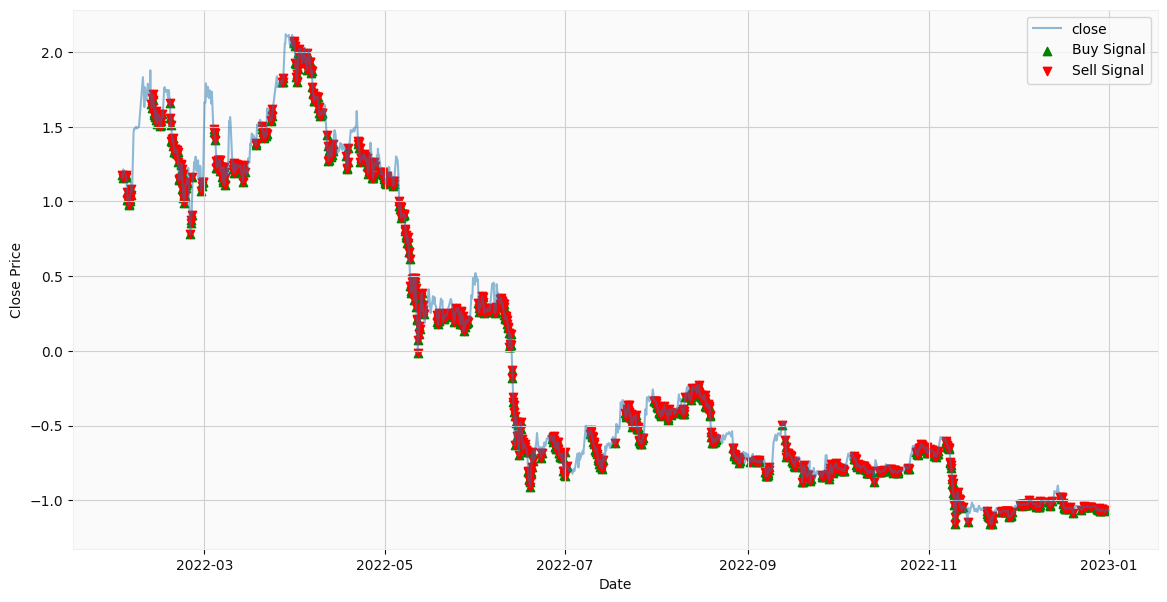

In [ ]:
#The trading strategy helps to predict at what time to buy or sell
plt.figure(figsize=(14,7))
plt.plot(new['close'], alpha=0.5, label='close')
plt.scatter(new.index, new['Buy'], color='green', label='Buy Signal', marker='^',alpha=1)
plt.scatter(new.index, new['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#**Backtesting for Sample 2**

In [ ]:
data = pd.read_csv("/content/Sample2 (2).csv")

In [ ]:
data = data.set_index(pd.DatetimeIndex(data['date'].values))
data = data.drop('date',axis=1)
data.head()

,open,high,low,close,volume,percentage_change,short_ema,long_ema,MACD,signal_line,signal
2023-01-14 04:00:00,-2.202348,-2.199424,-2.206542,-2.211332,1.090009,0.033519,-2.172284,-2.123152,0.000000,0.000000,0
2023-01-14 08:00:00,-2.221687,-2.200757,-2.205319,-2.183509,0.486213,0.792656,-2.172284,-2.123152,0.002219,0.000444,2
2023-01-14 12:00:00,-2.226819,-2.215132,-2.211652,-2.215723,1.090009,-0.857135,-2.172284,-2.123152,0.001363,0.000628,2
2023-01-14 16:00:00,-2.226819,-2.241486,-2.211652,-2.231703,1.090009,-1.068167,-2.172284,-2.123152,-0.002493,0.000004,1
2023-01-14 20:00:00,-2.226819,-2.241486,-2.211652,-2.230408,1.090009,0.720413,-2.172284,-2.123152,-0.003487,-0.000695,1


In [ ]:
data.head()

,open,high,low,close,volume,percentage_change,short_ema,long_ema,MACD,signal_line,signal
2023-01-14 04:00:00,-2.202348,-2.199424,-2.206542,-2.211332,1.090009,0.033519,-2.172284,-2.123152,0.000000,0.000000,0
2023-01-14 08:00:00,-2.221687,-2.200757,-2.205319,-2.183509,0.486213,0.792656,-2.172284,-2.123152,0.002219,0.000444,2
2023-01-14 12:00:00,-2.226819,-2.215132,-2.211652,-2.215723,1.090009,-0.857135,-2.172284,-2.123152,0.001363,0.000628,2
2023-01-14 16:00:00,-2.226819,-2.241486,-2.211652,-2.231703,1.090009,-1.068167,-2.172284,-2.123152,-0.002493,0.000004,1
2023-01-14 20:00:00,-2.226819,-2.241486,-2.211652,-2.230408,1.090009,0.720413,-2.172284,-2.123152,-0.003487,-0.000695,1


In [ ]:
data.isna().sum()

open                 0
high                 0
low                  0
close                0
volume               0
percentage_change    0
short_ema            0
long_ema             0
MACD                 0
signal_line          0
signal               0
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC  # Import the Support Vector Classification model if not done previously

# Assuming svc_model is your pre-trained Support Vector Classification model
# X_new is your new dataset features, and Y_new is the corresponding labels
X_new = data[['open', 'high', 'low', 'close', 'volume', 'percentage_change', 'short_ema', 'long_ema', 'MACD', 'signal_line']]
Y_new = data['signal'].values

# Make sure your Support Vector Classification (SVC) model is trained and loaded as svc_model

# Make predictions on the new data
predicted_signals = svc_model.predict(X_new)

# Evaluate accuracy on the new data
accuracy = accuracy_score(Y_new, predicted_signals)

print("Model accuracy on new data:", accuracy)

Model accuracy on new data: 0.8548990276738968


In [ ]:
X_new = data[['open', 'high', 'low', 'close', 'volume', 'percentage_change', 'short_ema', 'long_ema', 'MACD', 'signal_line']]
Y_new = data['signal'].values

# Make sure your decision tree model is trained and loaded as svc_model

# Make predictions on the new data
predicted_signals = dt_classifier.predict(X_new)

# Evaluate accuracy on the new data
accuracy = accuracy_score(Y_new, predicted_signals)

print("Model accuracy on new data:", accuracy)

Model accuracy on new data: 0.881077038145101


In [ ]:
import pandas as pd

class MeanReversionStrategy:
    def __init__(self, initial_balance, lookback_window, entry_threshold, exit_threshold, stop_loss_percentage):
        self.position = 0  # 0: No position, 1: Short position, 2: Long position
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.trades = []
        self.lookback_window = lookback_window
        self.entry_threshold = entry_threshold
        self.exit_threshold = exit_threshold
        self.stop_loss_percentage = stop_loss_percentage

    def initialize_data(self, new, predicted_signals):
        self.data = new
        self.data['rolling_mean'] = self.data['close'].rolling(window=self.lookback_window).mean()
        self.data['rolling_std'] = self.data['close'].rolling(window=self.lookback_window).std()
        self.data['rolling_mean'] = self.data['rolling_mean'].fillna(method='bfill')
        self.data['rolling_std'] = self.data['rolling_std'].fillna(method='bfill')
        self.data['z_score'] = 0
        self.data['predicted_signal'] = predicted_signals

    def execute_strategy(self):
        for index, row in self.data.iterrows():
            if self.position == 0:
                rolling_std = max(1e-8, row['rolling_std'])  # Avoid division by zero
                self.data.at[index, 'z_score'] = (row['close'] - row['rolling_mean']) / rolling_std

                if self.data.at[index, 'predicted_signal'] == 1 and self.data.at[index, 'z_score'] > self.entry_threshold:
                    # Mean reversion: Predicted to sell, go short
                    self.enter_position('Short', row['close'], index)

                elif self.data.at[index, 'predicted_signal'] == 2 and self.data.at[index, 'z_score'] < -self.entry_threshold:
                    # Mean reversion: Predicted to buy, go long
                    self.enter_position('Long', row['close'], index)

            elif self.position == 1:
                rolling_std = max(1e-8, row['rolling_std'])  # Avoid division by zero
                self.data.at[index, 'z_score'] = (row['close'] - row['rolling_mean']) / rolling_std

                if self.data.at[index, 'predicted_signal'] == 0 or row['close'] >= self.stop_loss_price:
                    # Exit short position due to predicted reversal or stop-loss trigger
                    self.exit_position('Cover', row['close'], index)

            elif self.position == 2:
                rolling_std = max(1e-8, row['rolling_std'])  # Avoid division by zero
                self.data.at[index, 'z_score'] = (row['close'] - row['rolling_mean']) / rolling_std

                if self.data.at[index, 'predicted_signal'] == 0 or row['close'] <= self.stop_loss_price:
                    # Exit long position due to predicted reversal or stop-loss trigger
                    self.exit_position('Sell', row['close'], index)

    def enter_position(self, action, entry_price, index):
        if action == 'Short':
            self.position = 1
        elif action == 'Long':
            self.position = 2

        self.entry_price = entry_price
        self.position_size = self.balance / entry_price
        self.stop_loss_price = entry_price * (1 + self.stop_loss_percentage) if self.position == 1 else entry_price * (1 - self.stop_loss_percentage)
        self.balance -= self.position_size * entry_price
        self.trades.append((action, index, entry_price, self.position_size, self.stop_loss_price))

    def exit_position(self, action, exit_price, index):
        if self.position == 1:
            self.position = 0
            self.balance += self.position_size * exit_price
        elif self.position == 2:
            self.position = 0
            self.balance += self.position_size * exit_price
        self.trades.append((action, index, exit_price, self.position_size))

# Usage example:
initial_balance = 1000
lookback_window = 15
entry_threshold = 3.0
exit_threshold = 0.5
stop_loss_percentage = 1.0

# Assuming 'new' is your DataFrame and 'predicted_signals' is available
strategy = MeanReversionStrategy(initial_balance, lookback_window, entry_threshold, exit_threshold, stop_loss_percentage)
strategy.initialize_data(data, predicted_signals)
strategy.execute_strategy()

# Calculate final balance
final_balance = strategy.balance + strategy.position_size * strategy.data['close'].iloc[-1] if strategy.position in [1, 2] else strategy.balance

# Calculate profits or losses
profit_loss = final_balance - initial_balance

# Display results
print(f"Initial Balance: {initial_balance} USDT")
print(f"Final Balance: {final_balance} USDT")
print(f"Profit/Loss: {profit_loss} USDT")

# Display trades
trades_df = pd.DataFrame(strategy.trades, columns=['Action', 'Date', 'Price', 'Size', 'Stop-Loss Price'])
print("\nTrades:")
print(trades_df)


Initial Balance: 1000 USDT
Final Balance: 2608.178335791051 USDT
Profit/Loss: 1608.1783357910508 USDT

Trades:
  Action                Date     Price         Size  Stop-Loss Price
0  Short 2023-09-07 23:00:00 -0.305927 -3268.749870        -0.611855
1  Cover 2023-09-08 03:00:00 -0.289839 -3268.749870              NaN
2  Short 2023-10-20 15:00:00  0.893161  1060.738501         1.786322
3  Cover 2023-10-24 05:00:00  2.458833  1060.738501              NaN


In [ ]:
data['Buy'] = np.where(data['predicted_signal']==1, data['close'], np.nan)
data['Sell'] = np.where(data['predicted_signal']==1, data['close'], np.nan)

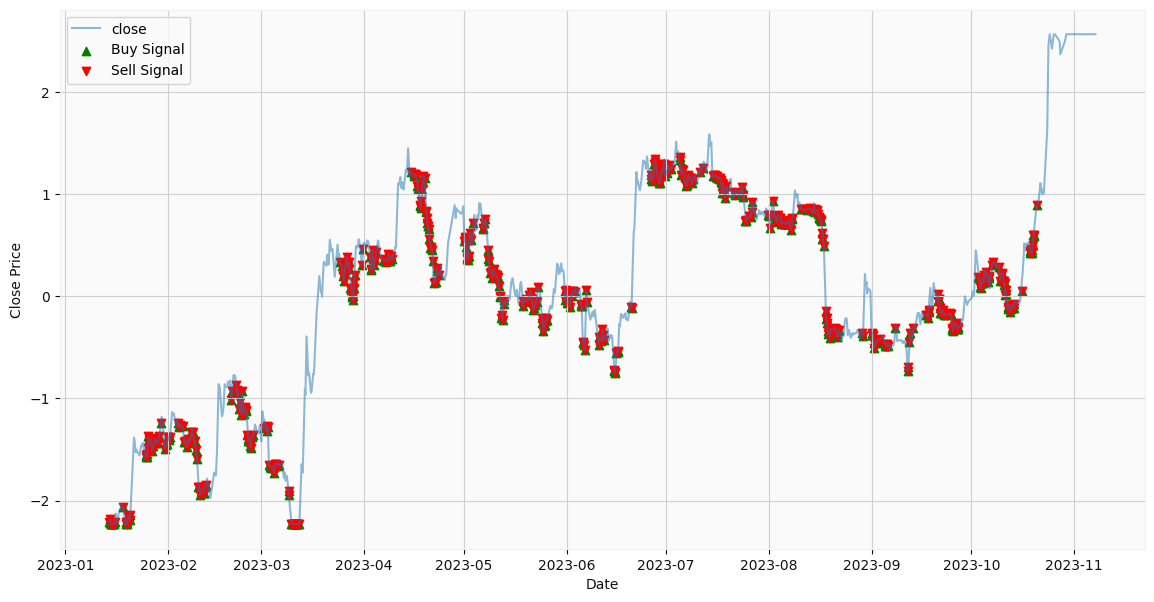

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(data['close'], alpha=0.5, label='close')
plt.scatter(data.index, data['Buy'], color='green', label='Buy Signal', marker='^',alpha=1)
plt.scatter(data.index, data['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()